### The company tasks me to create a model that predicts whether or not these leads will complete the electronic signature phase of the loan apploication. Thee company seeks to leverage this model to identify less "quality" appliocants(e.g. those who are not responding to thee onboarding process), and experiment with giving them different onboarding screens

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

## EDA 

In [2]:
df = pd.read_csv("P39-Financial-Data.csv")
df.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [3]:
rows, cols =  df.shape
print(rows, cols)

17908 21


In [4]:
df.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
entry_id                17908 non-null int64
age                     17908 non-null int64
pay_schedule            17908 non-null object
home_owner              17908 non-null int64
income                  17908 non-null int64
months_employed         17908 non-null int64
years_employed          17908 non-null int64
current_address_year    17908 non-null int64
personal_account_m      17908 non-null int64
personal_account_y      17908 non-null int64
has_debt                17908 non-null int64
amount_requested        17908 non-null int64
risk_score              17908 non-null int64
risk_score_2            17908 non-null float64
risk_score_3            17908 non-null float64
risk_score_4            17908 non-null float64
risk_score_5            17908 non-null float64
ext_quality_score       17908 non-null float64
ext_quality_score_2     17908 non-null float64
inquiries_last_month   

### Cleaning the data 

In [6]:
df.isna().any()

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

### Histograms

In [7]:
### Remvoing categorical variables 
df2 = df.drop(columns=["entry_id", "pay_schedule", "e_signed"])
df2.head()

,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
0,40,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10
1,61,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9
2,23,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7
3,40,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8
4,33,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12


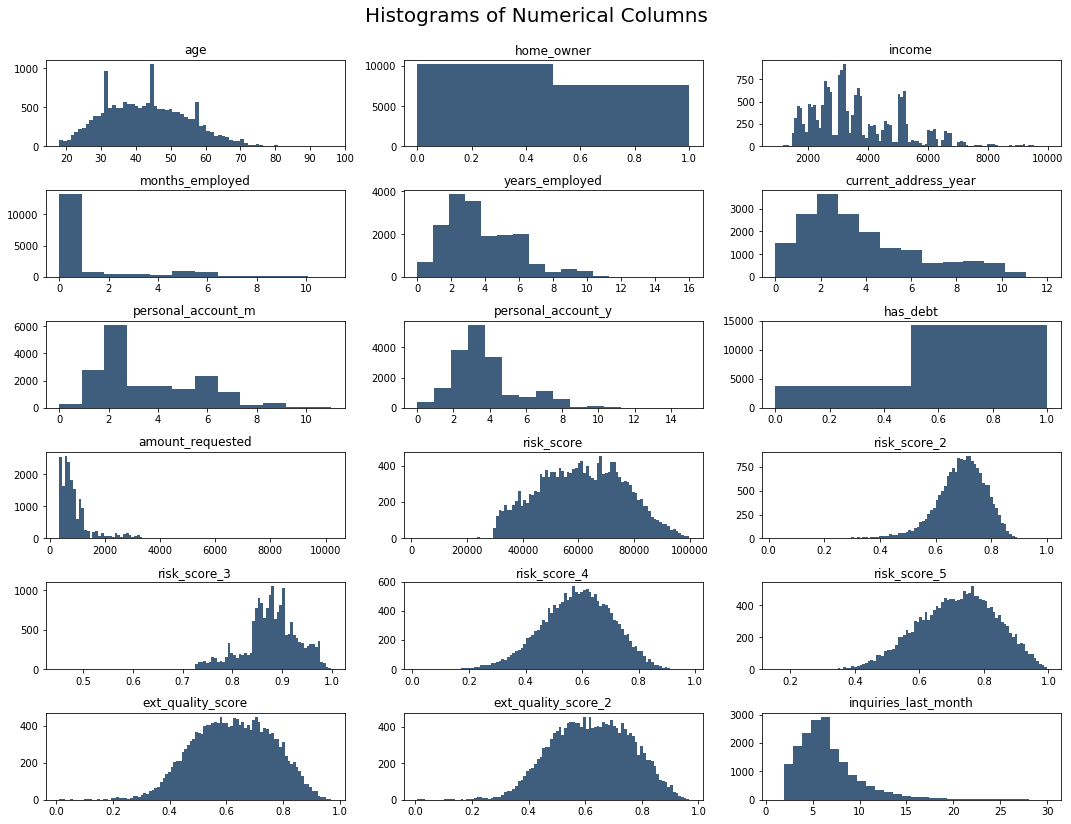

In [8]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(df2.shape[1]):#plot for each column in data
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(df2.columns.values[i])

    vals = np.size(df2.iloc[:, i].unique())
    if vals >= 100: #limiting to a maxium of 100 unique values in th
        vals = 100
     
    plt.hist(df2.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

There seem to be somehting strange with the "months_emplyed" ettersom det kan se ut som histogramet vårt setter verdiene til 1 år eksagt, 2 eksagt etc... Mao alle stopper på hele årstall. 

### Correlation with repsonse variable(note: models like RF are not linear like these)

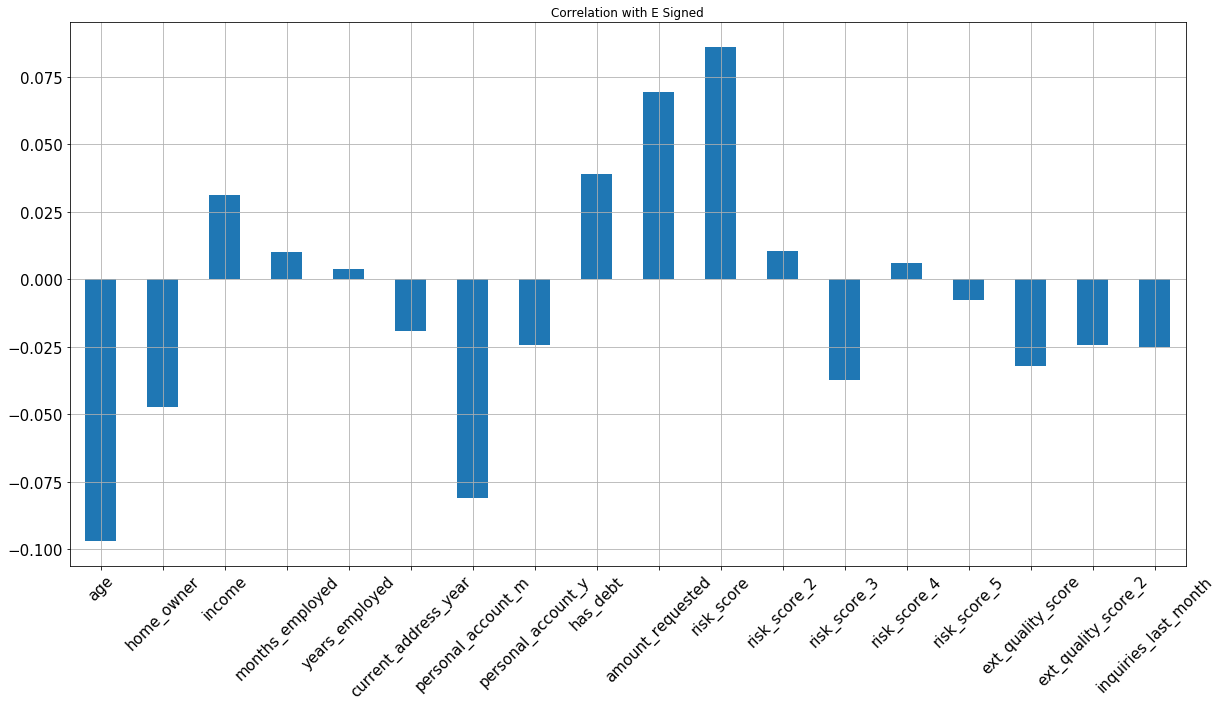

In [9]:
df2.corrwith(df.e_signed).plot.bar(
        figsize = (20, 10), title = "Correlation with E Signed", fontsize = 15,
        rot = 45, grid = True)

Now if the correlation are negative in nature that means that as the variable increases the likelihood of the response will be positive decreases.

And if it's positive like this chart here when the variable increases the likelihood of the response variable being positive increases.

Med andre ord; jo mer variabel med negativ korrelasjon øker i negativ forstand - jo større sansyligheet for at "E_signed" er negativ og omvendt

- Meaning that either person has a debt like they owe money on their credit cards then they're more likely to onboard(E_sign).


- So as the initial risk score increases the relationship with the response variable - it increases. Now this could be because we have not normalized our relationship yet none of these features are normal as yet but it's going to be done in the data pre-processing part

### Correlation Matrix

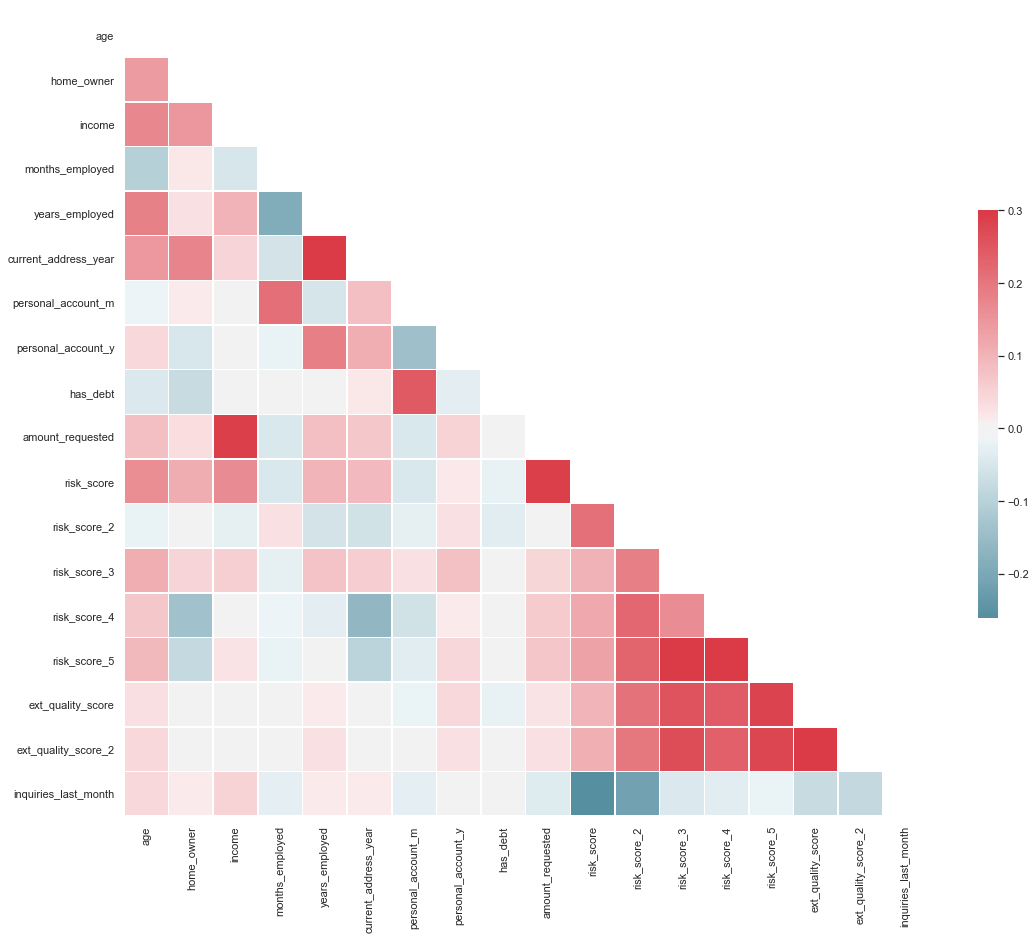

In [10]:
## Correlation Matrix
sn.set(style="white")

# Compute the correlation matrix
corr = df2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


Vi ser det er tale om ganske lave korrelasjoner mellom de ulike variablenee da man ser i legend at øverste nivå er på 0.3 og laveste er -0.2


- The more income you make in per month, the more likely you are to request higher amounts of money for your loan application.

- gir mening at risk score er korrelert med "amount score"

### Feature engineering

In [11]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import random
import time

In [12]:
random.seed(100)

In [13]:
# Kvitte oss med column som ikke ga mening "months_employed"
df = df.drop(columns=["months_employed"])
df.head()

,entry_id,age,pay_schedule,home_owner,income,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


And to do that we have to remember that we have a column called personal account M that tells us how many months the person has had in their personal account and we have a similar call them personal accounts.

Why that is how many years that person has had with that credit card that they have.

In [14]:
df["personal_account_months"] = (df.personal_account_m + (df.personal_account_y*12))

In [15]:
df[['personal_account_m', 'personal_account_y', 'personal_account_months']].head()

,personal_account_m,personal_account_y,personal_account_months
0,6,2,30
1,2,7,86
2,7,1,19
3,2,7,86
4,2,8,98


Vi ser at første person har hatt en account i 2 år og 6 mnd hvilket nå blir representert i form av 30mnd

In [16]:
df = df.drop(columns = ['personal_account_m', 'personal_account_y'])
df.head()

,entry_id,age,pay_schedule,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_account_months
0,7629673,40,bi-weekly,1,3135,3,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,30
1,3560428,61,weekly,0,3180,6,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,86
2,6934997,23,weekly,0,1540,0,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,19
3,5682812,40,bi-weekly,0,5230,6,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,86
4,5335819,33,semi-monthly,0,3590,5,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,98


### Data Preprocessing

In [17]:
#### One hot encoding - lage dummy variabler av kategoriske variablet

In [18]:
df = pd.get_dummies(df)
df.columns
# Ser at at "pay_schedule_.." er nå delt inn i fire dummy variabler
# En av disse må fjernes for å unngå the dummy trap
# Ellers blir de linjært avhengige av hverandre

Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

In [19]:
#I personally going to remove semi-monthly just because semi-monthly is the strnagest of the pay schedules, so an odds are going to be the less frequent.

In [20]:
df = df.drop(columns=["pay_schedule_semi-monthly"])

In [46]:
# Remving extra columns
response = df['e_signed']
users = df["entry_id"]
df = df.drop(columns=["e_signed", "entry_id"])

In [47]:
# Spltting into Training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, response,
                                                   test_size=0.2,
                                                   random_state=0)

In [50]:
### Feature scaling 
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()

In [53]:
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

/anaconda3/envs/deep_learning/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/deep_learning/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/envs/deep_learning/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


## Data Modeling 

### Logistic regression 

In [102]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, penalty="l1")
classifier.fit(X_train, y_train)

/anaconda3/envs/deep_learning/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [103]:
#Prediction Test Set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

In [104]:
results = pd.DataFrame([["Linear Regression(Lasso)", acc, prec, rec, f1]],
            columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

In [105]:
results.head()

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression(Lasso),0.561977,0.575963,0.705913,0.634351


- Accuracy og precision er helt ok
- Recall på 70% tilsier at det er noe bias i modellen



Now if you guys want to remember the **precision** is the rate of true positives divided by the rate of true positives and false positives.

That means that out of all the predictive positives we want to know how many have been predicted right and how many are wrong.

For **recall score** -   What it means is true positives divided by true positives and false negatives. That tells us a little bit different story tells us and of all the actual positives. How many do we predict to be actually true. So the recall is telling us that out of all the actual positives we have predicted them to be true around 70 percent of the time which is good but for precision we have felt short.

 ### SVM ( Linear) 

In [106]:
from sklearn.svm import SVC
classifier = SVC(random_state=0, kernel="linear")
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [107]:
#Prediction Test Set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([["SVM(Linear)", acc, prec, rec, f1]],
            columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

In [108]:
results = results.append(model_results, ignore_index=True)
results.head()

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression(Lasso),0.561977,0.575963,0.705913,0.634351
1,SVM(Linear),0.568398,0.577769,0.735996,0.647354


### SVM (rbf)

In [109]:
from sklearn.svm import SVC
classifier = SVC(random_state=0, kernel="rbf")
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [110]:
#Prediction Test Set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model1_results = pd.DataFrame([["SVM(RBF)", acc, prec, rec, f1]],
            columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

In [111]:
results = results.append(model1_results, ignore_index=True)
results.head()

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression(Lasso),0.561977,0.575963,0.705913,0.634351
1,SVM(Linear),0.568398,0.577769,0.735996,0.647354
2,SVM(RBF),0.591569,0.605730,0.690871,0.645505


### Random Forrest 

In [112]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier (random_state=0, n_estimators=100,
                                    criterion="entropy")
classifier.fit(X_train, y_train)

#Prediction Test Set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model2_results = pd.DataFrame([["Random Forest", acc, prec, rec, f1]],
            columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

In [113]:
results = results.append(model2_results, ignore_index=True)
results.head()

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression(Lasso),0.561977,0.575963,0.705913,0.634351
1,SVM(Linear),0.568398,0.577769,0.735996,0.647354
2,SVM(RBF),0.591569,0.605730,0.690871,0.645505
3,Random Forest,0.621720,0.640098,0.678942,0.658948


### K-fold Cross Validation

In [115]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train,
                            cv=10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Random Forest Classifier Accuracy: 0.63 (+/- 0.03)


Modellen vår er ganske konsistent

## Parameter Tunning

### Grid Search

#### Round 1 - Entropy

In [122]:
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["gini"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

In [123]:
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 256.16 seconds


In [ ]:
# if error: conda install joblib

In [124]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.6386988691888873,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 12,
  'min_samples_leaf': 12,
  'min_samples_split': 2})

#### Round 2

In [125]:
parameters = {"max_depth": [None],
              "max_features": [8, 10, 12],
              'min_samples_split': [2, 3, 4],
              'min_samples_leaf': [8, 10, 12],
              "bootstrap": [True],
              "criterion": ["gini"]}


from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)


t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 254.00 seconds


In [131]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.6386988691888873,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 12,
  'min_samples_leaf': 12,
  'min_samples_split': 2})

In [128]:
# Predicting Test Set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [129]:
model_results3 = pd.DataFrame([['Random Forest (n=100, GSx2 + Gini)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results3, ignore_index = True)

Test Data Accuracy: 0.6354


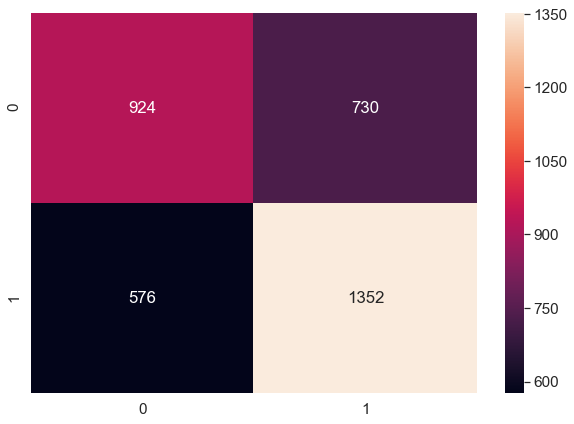

In [130]:
## EXTRA: Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))


In [132]:
# Formatting Final Results

final_results = pd.concat([y_test, users], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results = final_results[['entry_id', 'e_signed', 'predictions']]

In [134]:
final_results.head()

,entry_id,e_signed,predictions
8,6493191,1.0,0
9,8908605,1.0,0
12,6889184,1.0,1
16,9375601,0.0,1
18,8515555,1.0,1


Our model has given us an accuracy of around 64%. With this, we have an algorithm that can help predict whether or not a user wil complete the E-signing step of the loan application. One way to leverage this model is to target those predicted to not reach the e-sign phase with customized onboarding. 

This means that when a lead arrives from the marketplace, they may recive a different onboarding experience based on how likley they are to finish the genral onboarding process. This can help our company minimize how many people drop off the funnel. The funnel of screens is as effective as we, as a company, build it. Therefore, user drop-off in the funnel falls entierly on our shoulders. 

So, with new onbarding screens built intentionally to lead users ti finalize the loan apllicatiom, we can attept to get more that 40 % of those predicted not to finish the process to complete the e-sign step. If we can do this, then we can draticallu increase proftis. Many lending companies provide hundreds of loans every day, gaining money for each of them. As a result, if we can increase the number of loan takerm we are increasing profits. 

## Deep neural network - just for fun

In [ ]:
# Import necessary packages
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [23]:
# Initialize instance of H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,12 mins 42 secs
H2O cluster timezone:,Europe/Oslo
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.5
H2O cluster version age:,2 months and 2 days
H2O cluster name:,H2O_from_python_gunnarwindsand_v32osj
H2O cluster total nodes:,1
H2O cluster free memory:,3.817 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"locked, healthy"


In [24]:
df = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [25]:
df.describe()

Rows:17908
Cols:21




,entry_id,age,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_account_months,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_weekly
type,int,int,int,int,int,int,int,int,int,real,real,real,real,real,real,int,int,int,int,int,int
mins,1111398.0,18.0,0.0,905.0,0.0,0.0,0.0,350.0,2100.0,0.023258235,0.451371431,0.016724453,0.153367295,0.010184,0.006622,1.0,0.0,0.0,0.0,0.0,0.0
mean,5596977.616149201,43.015412106320916,0.4251731069912888,3657.2146526691945,3.526859504132233,3.5847107438016494,0.7953987044896136,950.4464485146261,61086.30221130216,0.6908776181187726,0.8782757628316964,0.5831545620014497,0.7182519798099726,0.6231124358945728,0.6220682098503458,6.457225820862202,0.5382510609783338,45.46738887647964,0.598391780209962,0.08331471967835605,0.20638820638820637
maxs,9999874.0,96.0,1.0,9985.0,16.0,12.0,1.0,10200.0,99750.0,0.999997479,0.999023613,0.978932031,0.996259854,0.970249,0.966953,30.0,1.0,183.0,1.0,1.0,1.0
sigma,2562472.7506680884,11.873106909579494,0.49438303412324014,1504.890063360767,2.259731727120848,2.7519366640617537,0.4034212357201099,698.5436832136473,15394.255019831024,0.09047039328192515,0.05456319219119624,0.12506128244136028,0.12069733703713327,0.1397285299694975,0.13989830159611225,3.673092510083983,0.4985486291696577,23.25882921577832,0.4902371650380962,0.27636505235740405,0.4047236853367532
zeros,0,0,10294,0,694,1486,3664,0,0,0,0,0,0,0,0,0,8269,130,7192,16416,14212
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,7629673.0,40.0,1.0,3135.0,3.0,3.0,1.0,550.0,36200.0,0.7373983190000001,0.903517238,0.4877125,0.515976695,0.580918,0.380918,10.0,1.0,30.0,1.0,0.0,0.0
1,3560428.0,61.0,0.0,3180.0,6.0,3.0,1.0,600.0,30150.0,0.7385100840000001,0.881026665,0.713423437,0.826401956,0.73072,0.63072,9.0,0.0,86.0,0.0,0.0,1.0
2,6934997.0,23.0,0.0,1540.0,0.0,0.0,1.0,450.0,34550.0,0.6429932770000001,0.76655369,0.595017969,0.762283825,0.531712,0.531712,7.0,0.0,19.0,0.0,0.0,1.0


In [34]:
x = df.columns
x.remove('e_signed')
x.remove("entry_id")
y = "e_signed"

In [35]:
# Task 8: Do a test-train split (80-20)
splits = df.split_frame(ratios = [0.80])
train = splits[0]
test  = splits[1]

In [43]:
# Task 10: Train GBM Model
# Set parameters for GBM model 
from h2o.estimators.gbm import H2OGradientBoostingEstimator
gbm_model = H2OGradientBoostingEstimator(model_id="GBM_BadLoan",
                                         stopping_metric='AUC',
                                         score_each_iteration=True,
                                         ntrees=100,
                                         learn_rate=0.05)

In [44]:
# Build your model
gbm_model.train(x=x, y=y, training_frame=train, validation_frame=test)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


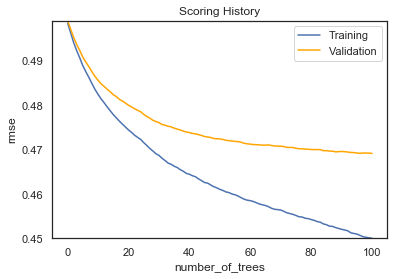

In [45]:
# Task 11: Plot the scoring history to make sure you're not overfitting
# Hint: Use plot function on the model object
%matplotlib inline
gbm_model.plot()

In [46]:
# Task 12: Plot the ROC curve for the binomial models and get auc using h2o.auc
# Hint: Use h2o.performance and plot to grab the modelmetrics and then plotting the modelmetrics

#gbm_model.model_performance(train = True).plot()
#gbm_model.model_performance(valid = True).plot()

print("Training AUC =" + str(gbm_model.auc(train = True)))
print("Validation AUC =" + str(gbm_model.auc(valid = True)))

KeyError: 'AUC'

In [47]:
gbm_model


Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_BadLoan


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.2026003618876171
RMSE: 0.4501114993950022
MAE: 0.42756068690006754
RMSLE: 0.3174671481904509
Mean Residual Deviance: 0.2026003618876171

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.22012955657294306
RMSE: 0.46917966342643525
MAE: 0.44682155433682214
RMSLE: 0.33070756332240825
Mean Residual Deviance: 0.22012955657294306
Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2019-08-21 00:23:52,0.009 sec,0.0,0.4984248,0.4968545,0.2484272,0.4989758,0.4974041,0.2489769
,2019-08-21 00:23:52,0.021 sec,1.0,0.4962578,0.4946438,0.2462718,0.4970765,0.4954493,0.2470850
,2019-08-21 00:23:52,0.030 sec,2.0,0.4940316,0.4922895,0.2440672,0.4952105,0.4934473,0.2452335
,2019-08-21 00:23:52,0.038 sec,3.0,0.4922314,0.4902875,0.2422918,0.4936340,0.4916631,0.2436745
,2019-08-21 00:23:52,0.047 sec,4.0,0.4905986,0.4883857,0.2406870,0.4922658,0.4900199,0.2423256
---,---,---,---,---,---,---,---,---,---
,2019-08-21 00:23:53,0.967 sec,96.0,0.4507883,0.4285790,0.2032101,0.4692085,0.4472050,0.2201566
,2019-08-21 00:23:53,0.977 sec,97.0,0.4504806,0.4281565,0.2029328,0.4692730,0.4471373,0.2202172
,2019-08-21 00:23:53,0.986 sec,98.0,0.4503414,0.4279641,0.2028074,0.4692723,0.4470692,0.2202165
,2019-08-21 00:23:53,0.996 sec,99.0,0.4502357,0.4277548,0.2027122,0.4692582,0.4469424,0.2202032



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
amount_requested,2439.4724121,1.0,0.3636600
risk_score,840.4044189,0.3445025,0.1252818
personal_account_months,819.5728760,0.3359632,0.1221764
income,612.9528809,0.2512645,0.0913749
age,518.6237793,0.2125967,0.0773129
risk_score_2,207.3559113,0.0850003,0.0309112
ext_quality_score,192.3107758,0.0788329,0.0286684
risk_score_3,164.1196136,0.0672767,0.0244658
risk_score_5,129.5134735,0.0530908,0.0193070
has_debt,121.1604538,0.0496667,0.0180618
